Name: Lim Yu Yang Ian

Class: DAAA/FT/2A/02

Admin No: 2201874

___

# Importing Modules

In [568]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Models
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, RidgeClassifierCV
from sklearn.dummy import DummyClassifier

# Import Model Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, cross_val_predict, learning_curve


#sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

#for saving models
import pickle

In [569]:
random_state = 42

___

# Describing data

In [570]:
df = pd.read_csv("./ST1511 AIML-CA1-datasets/credit_dataset.csv")
original = df.copy()
df.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


### Objective:

Allow banks to predict if customers will default on their payment.


### Background Information:

Banks collect their customers data, such as the attributes seen here like Age, Education, Gender, Marriage Status, Credit Limit, and Bill/ Pay history. This allows them to identify potential default risks. Other factors not in the dataset are factors such as credit score etc.

It is important for banks to predict if customers will default to prevent losses. 

Customers may default their payments due to worsening economy, increasing prices due to inflation, poor financial literacy, etc.

Bautzer, T. (2023). More US consumers are falling behind on payments. Reuters. [online] 19 Apr. Available at: https://www.reuters.com/markets/us/more-us-consumers-are-falling-behind-payments-2023-04-18/.


### Additional Information:

"Default is the failure to make required interest or principal repayments on a debt, whether that debt is a loan or a security. Individuals, businesses, and even countries can default on their debt obligations. Default risk is an important consideration for creditors." 

Chen, J. (2019). Exploring the Types of Default and the Consequences. [online] Investopedia. Available at: https://www.investopedia.com/terms/d/default2.asp.


### Prediction Task:

Predicting if a customer will default on payments based on the following attributes:

- Age
- Gender
- Level Of Education
- Marriage Status
- Credit Limit
- Bill and payment history

### Output Variable:

The output variable would indicate if a customer plans on defaulting their next payment. 

- 0: customer did not default
- 1: customer did default

As data collection has already been carried out, we can skip the first step and move to exploring the data.

___

# Data Observations

In [571]:
df.isna().sum()

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

As seen above, the data has no null values, thus we do not need to deal with NA values via row dropping etc.

In [572]:
df.describe()

,Customer ID,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,462.02453,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,1.00000,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,400.75000,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,800.50000,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,1200.25000,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,1600.00000,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


There are 1600 Entries in this database, with the data types as shown above. More importantly, we can see Gender, Education, Marriage Status are not integers, thus they will need to be encoded before carrying on. This will be done later.

In [574]:
df.shape

(1600, 13)

In [575]:
sns.set_style("darkgrid")

Showing distribution of Age and Credit Limit via a boxplot

<AxesSubplot: xlabel='Age'>

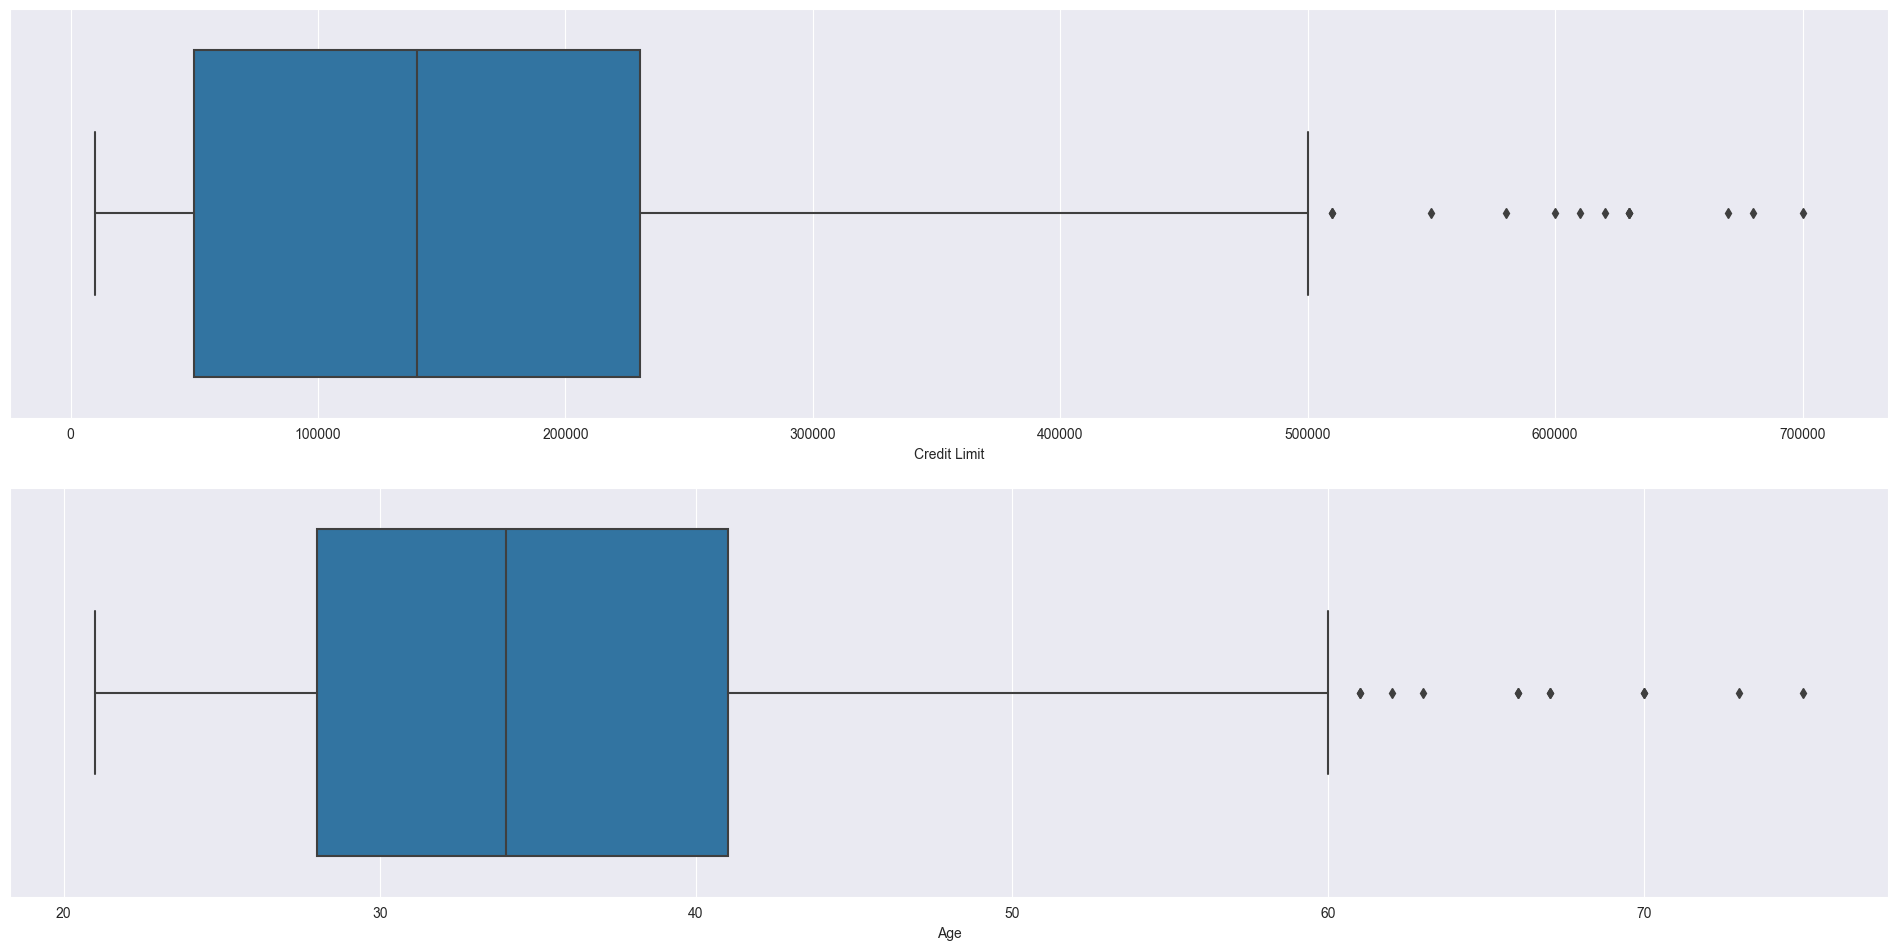

In [576]:
fig, ax = plt.subplots(2, 1, figsize = (20,10))
fig.tight_layout(pad = 3.0)
sns.boxplot(data = df, x = "Credit Limit", ax = ax[0])
sns.boxplot(data = df, x = "Age", ax = ax[1])

Showing the distribution of Age and Credit Limit seperated on default payment next month. This is done via a histplot with kde.

We can see that both credit limit and age are skewed to the left.

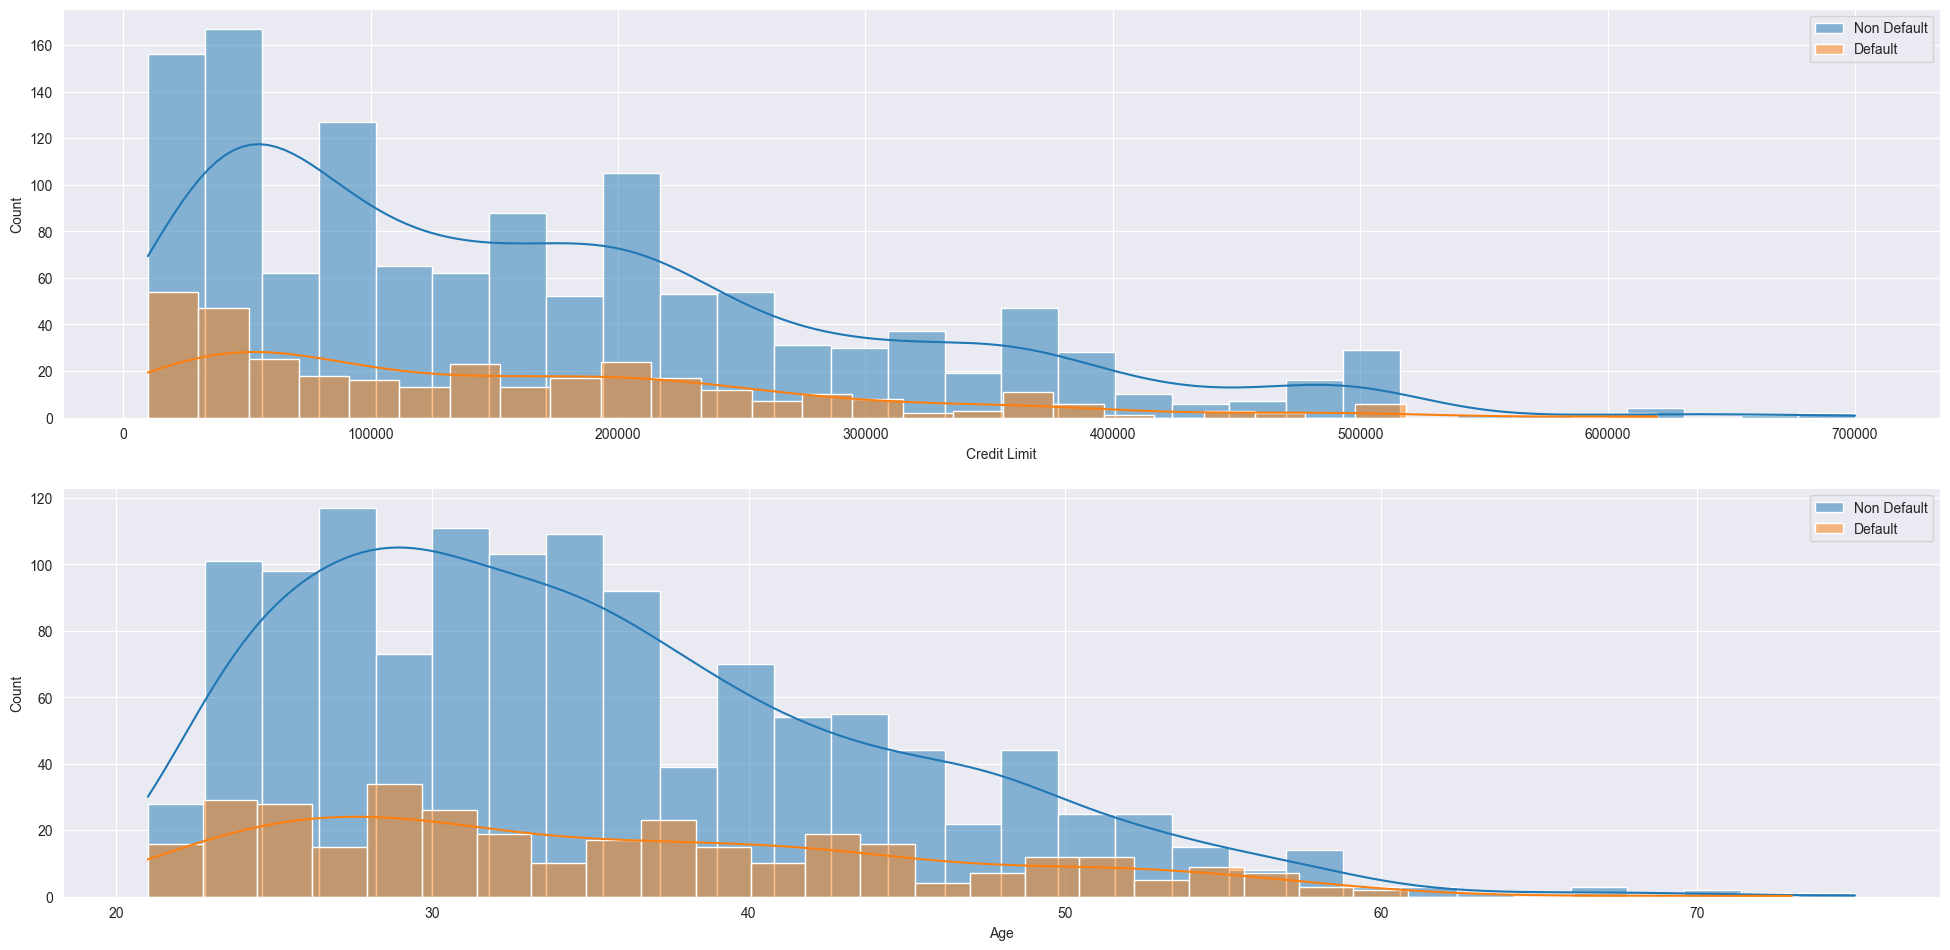

In [577]:
fig, ax = plt.subplots(2, 1, figsize = (20,10))
fig.tight_layout(pad = 3.0)
sns.histplot(df[df["Default payment next month"] == 0]["Credit Limit"], ax = ax[0], label = "Non Default", kde = True, bins=30)
sns.histplot(df[df["Default payment next month"] == 1]["Credit Limit"], ax = ax[0], label = "Default", kde = True, bins=30)
sns.histplot(df[df["Default payment next month"] == 0]["Age"], ax = ax[1], label = "Non Default", kde = True, bins=30)
sns.histplot(df[df["Default payment next month"] == 1]["Age"], ax = ax[1], label = "Default", kde = True, bins=30)
ax[0].legend()
ax[1].legend()

Showing the count of genders in the data using a countplot.

We can wee that there are 280 more Males then Females.

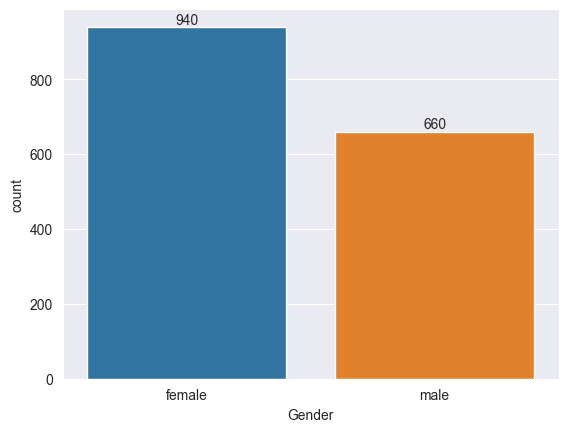

In [578]:
ax = sns.countplot(x = df["Gender"])
ax.bar_label(ax.containers[0])
plt.show()

Showing the distribution of Bill Amounts using a boxplot. 

This also shows it's incredible amount of outliers, especially outside the right fence.

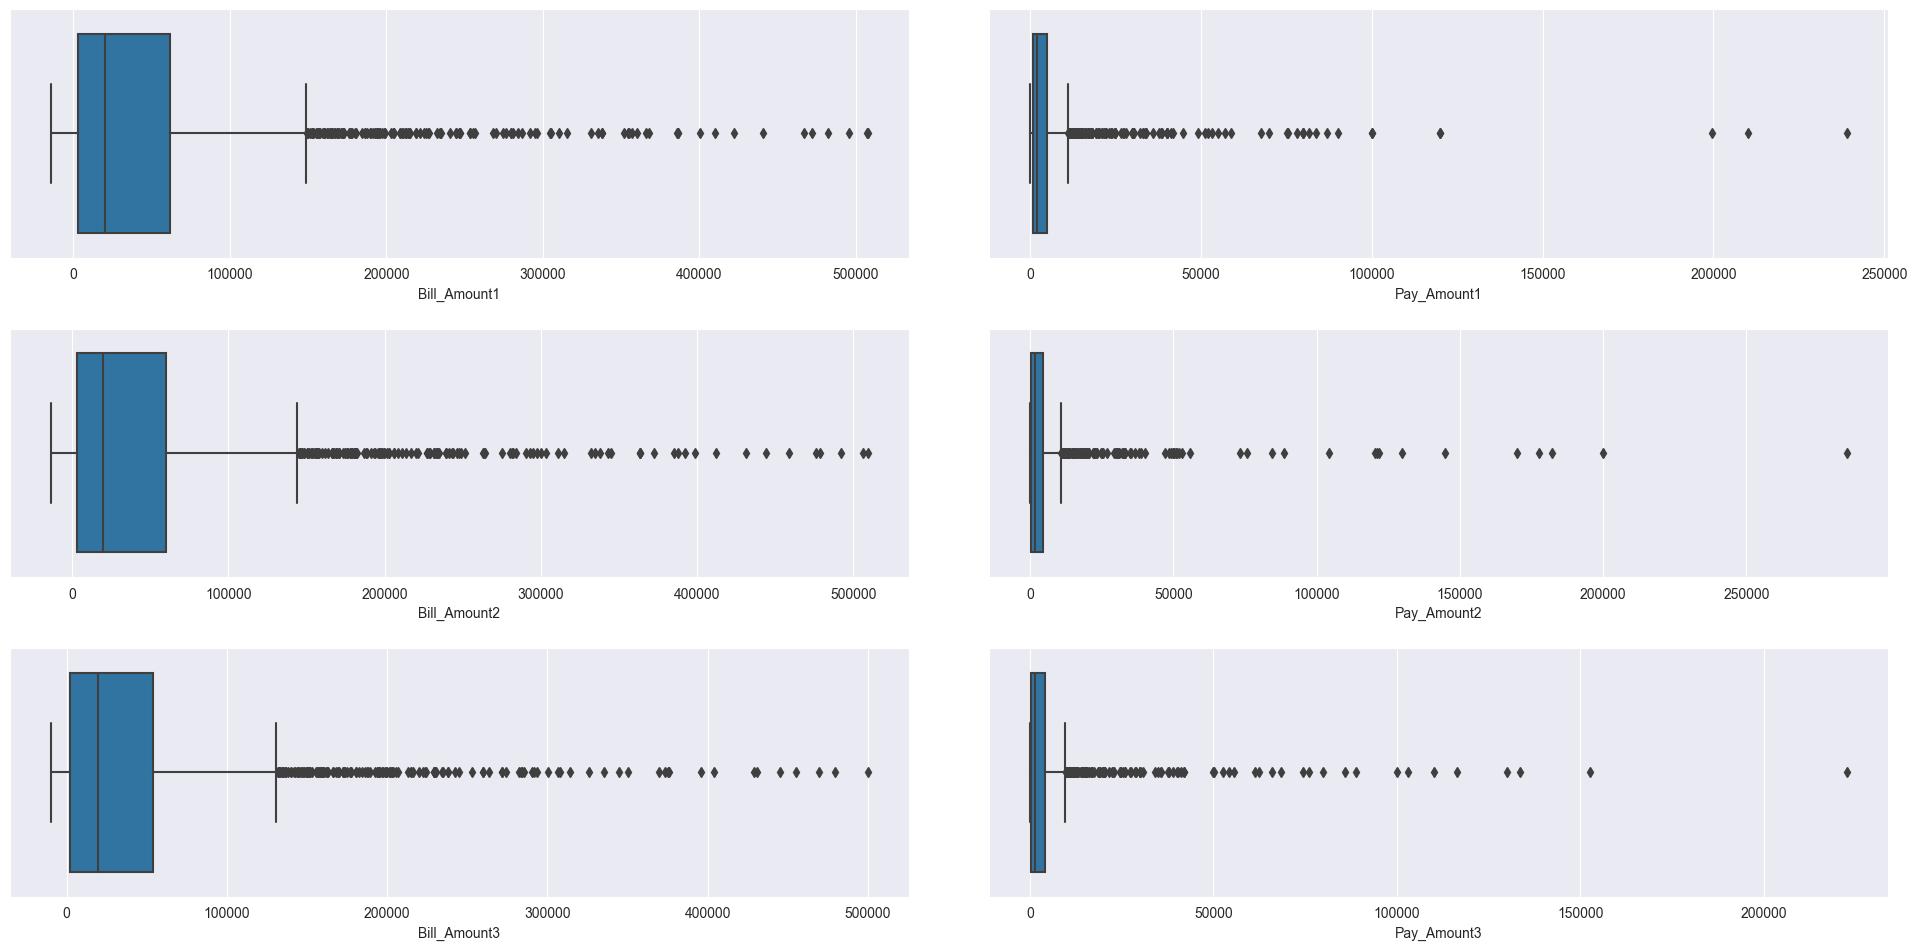

In [579]:
fig, ax = plt.subplots(3, 2, figsize = (20,10))
fig.tight_layout(pad = 3.0)
sns.boxplot(data=df, x="Bill_Amount1", ax = ax[0, 0])
sns.boxplot(data=df, x="Bill_Amount2", ax = ax[1, 0])
sns.boxplot(data=df, x="Bill_Amount3", ax= ax[2, 0])

sns.boxplot(data=df, x="Pay_Amount1", ax = ax[0, 1])
sns.boxplot(data=df, x="Pay_Amount2", ax = ax[1, 1])
sns.boxplot(data=df, x="Pay_Amount3", ax= ax[2, 1])

plt.show()

Showing the distribution of Pay Amounts using a boxplot. 

This also shows it's incredible amount of outliers, especially outside the right fence.

Here we plot the count of customers who defaulted or not.

We can see that our target is very imbalanced. With almost 4 times more customers who did not default as compared to those who did.

This would cause multiple issues when calculating and testing. Thus we can use Oversampling to handle this problem.

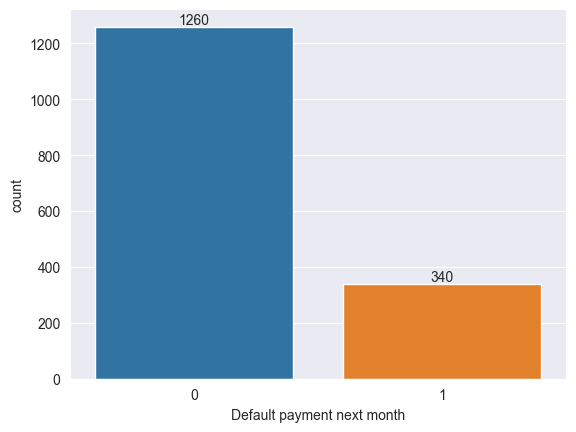

In [580]:
ax = sns.countplot(x = df["Default payment next month"])
ax.bar_label(ax.containers[0])
plt.show()

I use a heatplot to show the correlation between my variables in the dataset.

C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_26452\172161371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


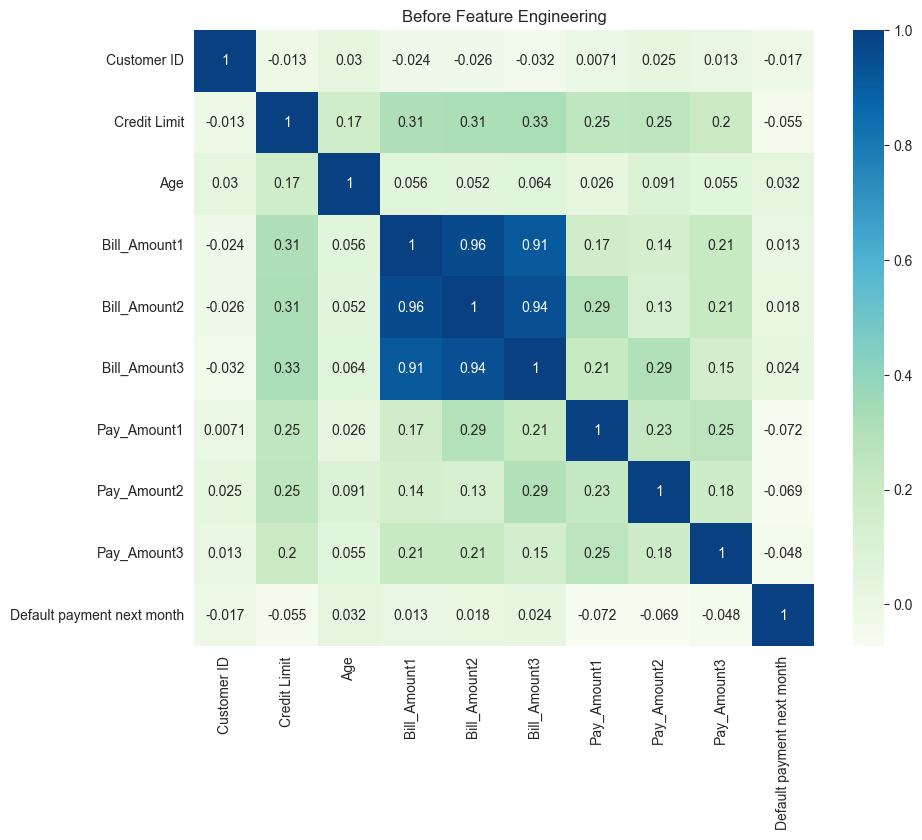

In [581]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.title("Before Feature Engineering")
plt.show()

Bill amount 1, 2, 3 have very high correlations, and thus feature engineering needs to be done for this.

A pairplot has a similar purpose to the above heatplot. However the pairplot allows me to see the patterns in greater details of each relationship.

This shows very similar results to the heatmap above, showing high correlation in the Bill amounts.

We can see that there are no clear clusters. So besides the bill amounts, there is not much correlation.

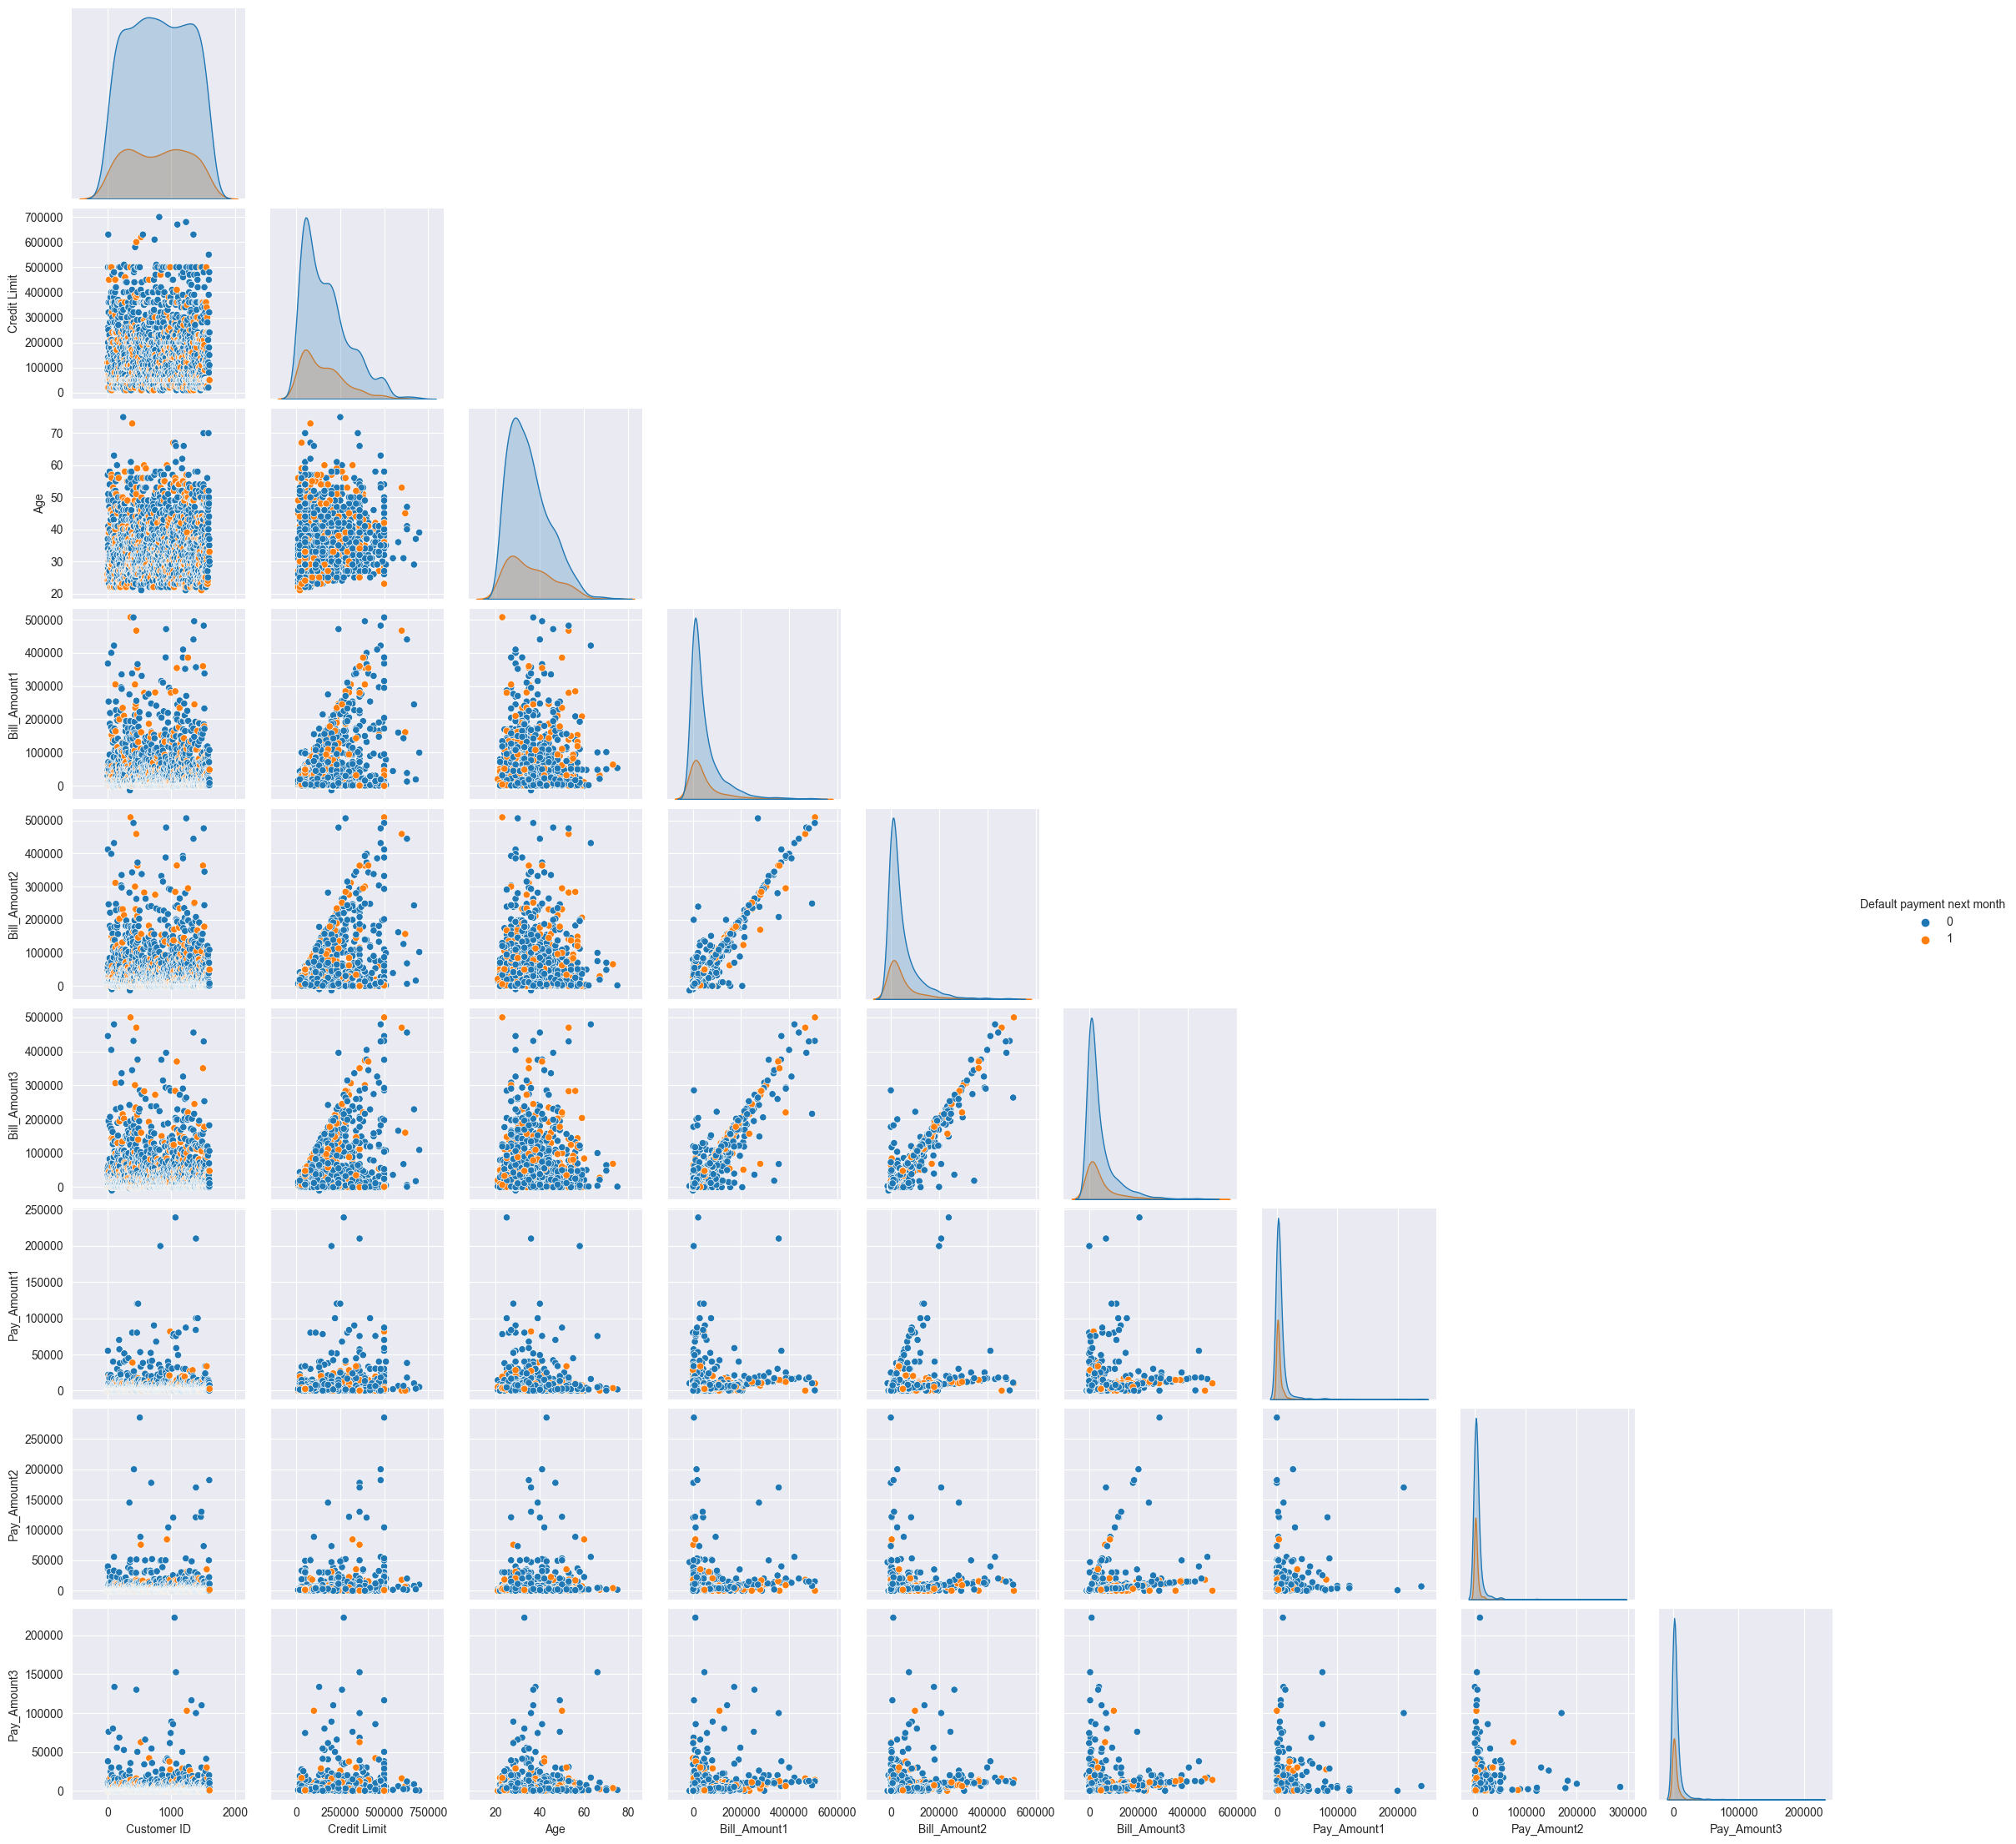

In [582]:
sns.pairplot(df, hue="Default payment next month", corner=True)
plt.show()

___

# Feature Engineering

Using Bill and Pay amounts, I generate their averages and use the exceed_payment column to indicate if their average bill amount is above their average pay amount

### Explanations of the new features:

#### Avgerage Bill

This allows the banks to know the average bill each of their customers have across the 3 months. 

This can improve the accuracy of the prediction model by capturing the amount of average credit card bill racked up a month. 

All 3 Bill amounts also have a very high correlation, and thus I will drop them and replace them with average bill. 

#### Avgerage Payment

This allows the bank to know the average in payments made to the bank a month. 

This can improve the accuracy of the prediction model by capturing the amount of payments made to the bank in a month. In addition to just having the individual payments for the respective months.

#### Exceed Payment

This allows for the bank to know based on their customers average bills and payments if they have exceeded their payment. 

This would improve the accuracy of the prediction model by capturing customers who have made enough payments to the bank in comparison to the bills they have from the bank.

#### Background

I added these features as banking is about a matter of confidence and trust. The bank needs to have the belief that their loans will be paid back in full. And thus the calculation of the average bill, and payments, which leads to the exceed payment attribute would be good in helping to calculate whether a customer has had a history of paying back their bills.

Gobat, J. (2022). Banks: At the Heart of the Matter. [online] IMF. Available at: https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Banks.

Feature Engineering

In [583]:
avg_bill = []
avg_payment = []
exceed_payment = []
for i, row in df.iterrows():
    avg_bill_amount = ((row["Bill_Amount1"] + row["Bill_Amount2"] + row["Bill_Amount3"])/3)
    avg_bill.append(avg_bill_amount)
    avg_payment_amount = ((row["Pay_Amount1"] + row["Pay_Amount2"] + row["Pay_Amount3"])/3)
    avg_payment.append(avg_payment_amount)

    if (avg_bill_amount > avg_payment_amount):
        exceed_payment.append(1)
    else:
        exceed_payment.append(0)

df["avg_bill"] = avg_bill
df["avg_payment"] = avg_payment
df["exceed_payment"] = exceed_payment

df = df.drop(columns=["Bill_Amount1", "Bill_Amount2", "Bill_Amount3", "Customer ID"])

df.head()

,Credit Limit,Gender,Education,Marriage Status,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,avg_bill,avg_payment,exceed_payment
0,20000,female,univeresity,married,24,0,689,0,1,2568.000000,229.666667,1
1,120000,female,univeresity,single,26,0,1000,1000,1,2363.000000,666.666667,1
2,90000,female,univeresity,single,34,1518,1500,1000,0,18941.666667,1339.333333,1
3,50000,female,univeresity,married,37,2000,2019,1200,0,48171.333333,1739.666667,1
4,50000,male,univeresity,married,57,2000,36681,10000,0,16707.333333,16227.000000,1


C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_26452\803085361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


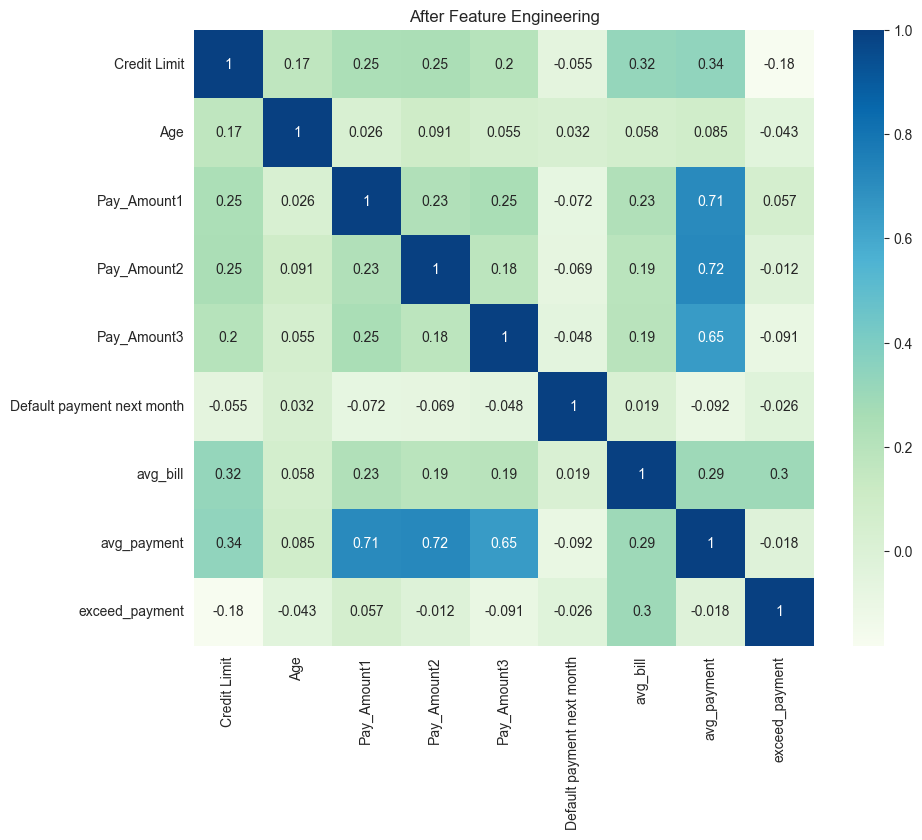

In [584]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.title("After Feature Engineering")
plt.show()

___

# Data Preperation

Below I set my target and analysis data.

In [585]:
X, y = df.drop(["Default payment next month"], axis=1), df["Default payment next month"]

##### We have multiple choices of Encoding methods here:

1. One Hot Encoding
    - One Hot encoding has the disadvantage of creating a high-dimentional and sparse representation when dealing with large number of categories. Gender, Education, and Marriage Status do not have many categories. And thus this is not an issue. Thus I will use this encoding method
2. Label Encoding
    - Label encoding would introduce abitrary ordinal relationships between categories which might mislead the learning algorithm. So we will not use it.
3. Ordinal Encoding
    - It assumes uniform differences between my encoded values. Which is not the case here. Thus I will not use this encoding method.
4. Count Encoding
    - This normally results in overfitting. Even though my correlation of my target variable has a very low correlation to variables. Thus there should be no issues, however, I will use One Hot encoding as it is more suitable for this type of categorical data, and I do not want to show the frequency of my data.
5. Binary Encoding
    - It assumes that the order of my categories matters. In this case, gender, or marriage status does not have an order. Thus I will not use this encoding method.
6. Target Encoding
    - This encoding method generally leads to overfitting when there are a low number of entries in the dataset. The provided dataset has very few values. Thus I will not use this encoding method.



### One Hot Encoding

As said earlier, there are non integer values. Thus I use one hot encoding to prepare my data. This makes it possible for me to use these variables when training my model.

In [586]:
hot_col = ["Gender", "Education", "Marriage Status"]
ohe = OneHotEncoder()
ohe.fit(X[hot_col])
X = pd.concat([
    X.drop(hot_col, axis=1).reset_index(drop=True),
    pd.DataFrame(
        ohe.transform(X[hot_col]).toarray(),
        columns=ohe.get_feature_names_out(),
    ),
],
axis=1)
display(X)

,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,avg_bill,avg_payment,exceed_payment,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
0,20000,24,0,689,0,2568.000000,229.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,120000,26,0,1000,1000,2363.000000,666.666667,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,90000,34,1518,1500,1000,18941.666667,1339.333333,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,50000,37,2000,2019,1200,48171.333333,1739.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,50000,57,2000,36681,10000,16707.333333,16227.000000,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,35,0,182123,12960,70456.000000,65027.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1596,150000,37,0,2772,0,1578.000000,924.000000,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1597,110000,29,7845,4000,4000,107758.333333,5281.666667,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1598,240000,30,7305,11263,10018,8754.000000,9528.666667,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Data Splitting

I now split my data into train and test data. I have a 70% of my dataset dedicated to train data, and 30% to testing

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y, shuffle=True)
display(y_train.head())

1235    1
1005    0
1313    0
1076    0
1034    0
Name: Default payment next month, dtype: int64

As I mentioned earlier, my target data is incredibly imbalanced. This is shown again below.

___

# Oversampling

Text(0.5, 1.0, 'Before Oversampling')

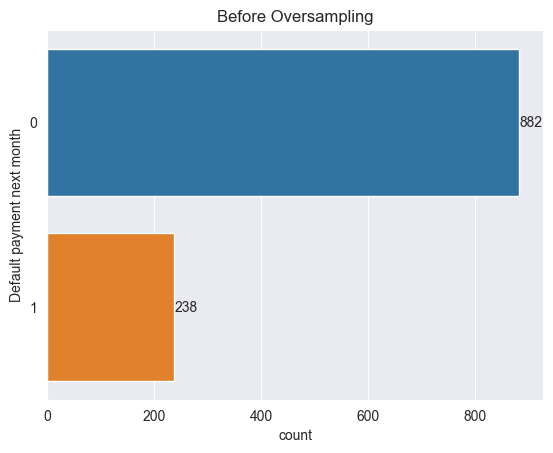

In [588]:
ax = sns.countplot(y=y_train)
ax.bar_label(ax.containers[0])
ax.set_title("Before Oversampling")

To handle this issue, I use oversampling, specifically using ADASYN to resolve this problem.

Since ADASYN is an extention os SMOTE, that focuses more on generating synthetic samples in regions where the minority class is more difficult to learn. I have chosen to use it over the other two methods of Random Oversampling, and SMOTE.

As we can see below, after the Oversampling, our data is much less imbalanced.

Text(0.5, 1.0, 'After Oversampling')

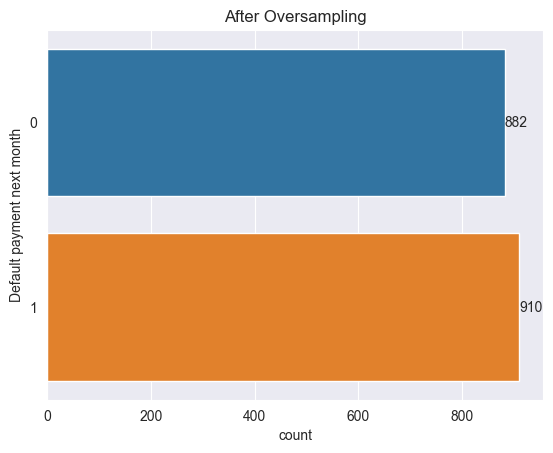

In [589]:
adasyn = ADASYN(random_state=random_state)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

ax = sns.countplot(y=y_train_adasyn)
ax.bar_label(ax.containers[0])
ax.set_title("After Oversampling")

In [590]:
round_col = ["exceed_payment", "Gender_female", "Gender_male", "Education_high school", "Education_post-graduate", "Education_univeresity", "Marriage Status_married", "Marriage Status_single"]
X_train_adasyn[round_col] = X_train_adasyn[round_col].round()
y_train_adasyn = y_train_adasyn.round()
display(pd.DataFrame(X_train_adasyn))
display(pd.DataFrame(y_train_adasyn))

,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,avg_bill,avg_payment,exceed_payment,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
0,30000,54,1700,3400,2528,26192.666667,2542.666667,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,140000,29,2024,1522,2580,3200.333333,2042.000000,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,430000,31,10000,5000,5540,37395.000000,6846.666667,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,500000,27,7434,6342,5276,201131.666667,6350.666667,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,60000,39,0,0,2000,-1930.000000,666.666667,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,50000,30,2118,2557,500,16205.917730,1725.143285,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1788,50000,29,2304,0,707,4415.834503,1004.269038,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1789,380000,48,12,0,0,1736.467884,4.211321,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1790,371080,43,543,0,0,3317.695634,181.126282,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0


,Default payment next month
0,1
1,0
2,0
3,0
4,0
...,...
1787,1
1788,1
1789,1
1790,1


___

# Standard Scaling

I use standard scaling. This makes it easier for my model to work.

In [591]:
name_col = ["Pay_Amount1", "Pay_Amount2", "Pay_Amount3", "avg_bill", "avg_payment", "Credit Limit"]
sc = StandardScaler()
X_test[name_col] = sc.fit_transform(X_test[name_col])
X_train_adasyn[name_col] = sc.fit_transform(X_train_adasyn[name_col])
X_train_adasyn.head()

,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,avg_bill,avg_payment,exceed_payment,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
0,-1.037680,54,-0.291969,-0.078936,-0.130370,-0.313110,-0.220199,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.186050,29,-0.261065,-0.217687,-0.125840,-0.647974,-0.278982,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.059156,31,0.499718,0.039276,0.132010,-0.149957,0.285128,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2.601102,27,0.254962,0.138426,0.109013,2.234731,0.226894,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.805417,39,-0.454122,-0.330137,-0.176365,-0.722693,-0.440458,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


___

# Training Models

In [592]:
def plot_learning_curve(model_name, model, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv)

    # Calculate mean and standard deviation of train and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='red')

    # Fill the area between the mean scores with color
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

    # Customize plot
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)

From the learning curves below. We can see that Decision Tree, Random Forest, and Gradient Boosting all have exponentially increasing validation scores when there is an increase of training examples.

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

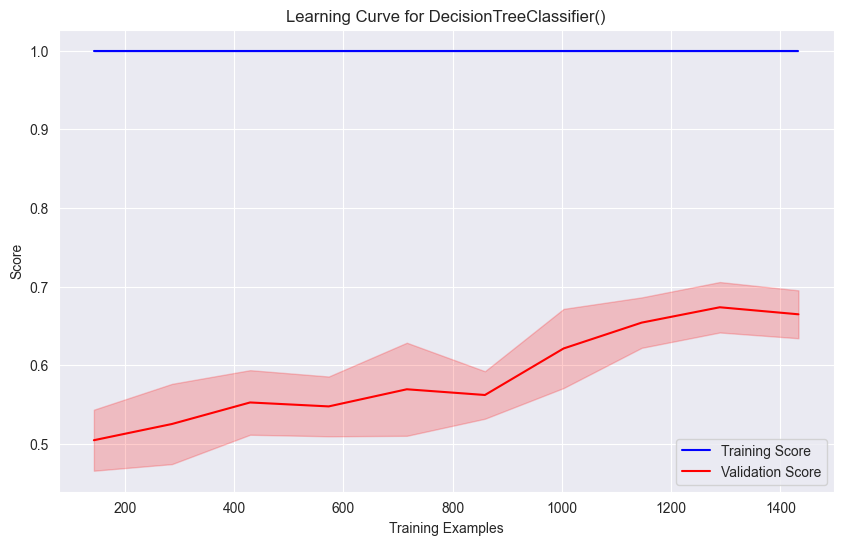

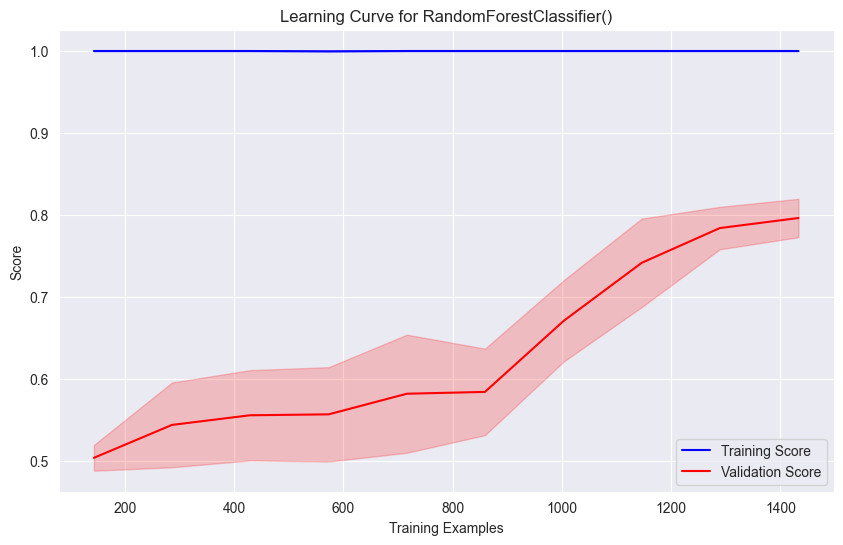

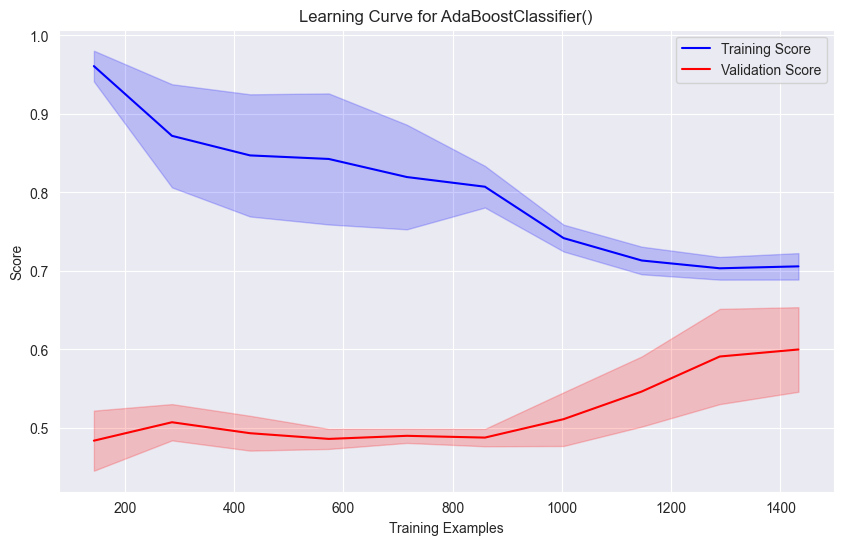

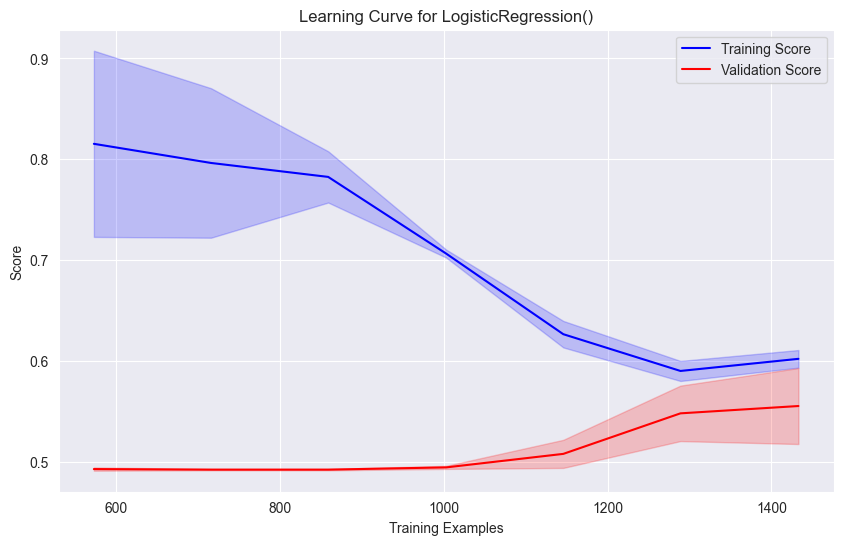

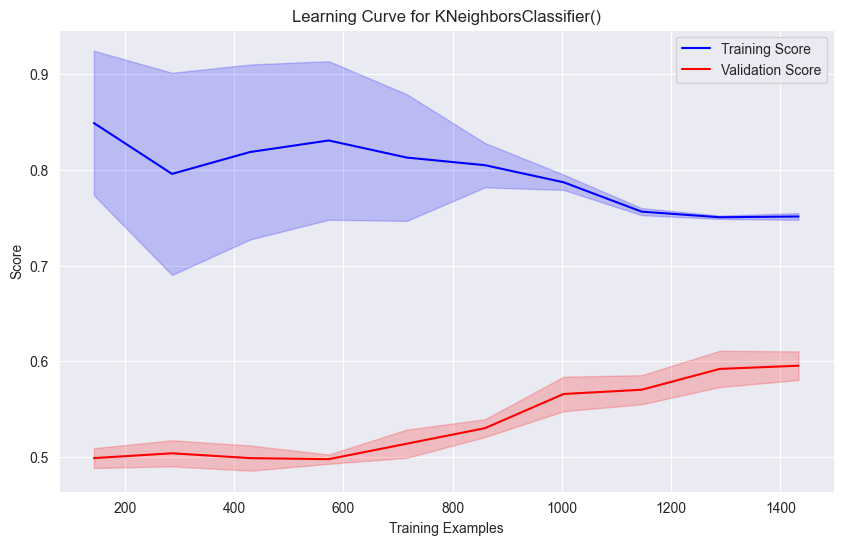

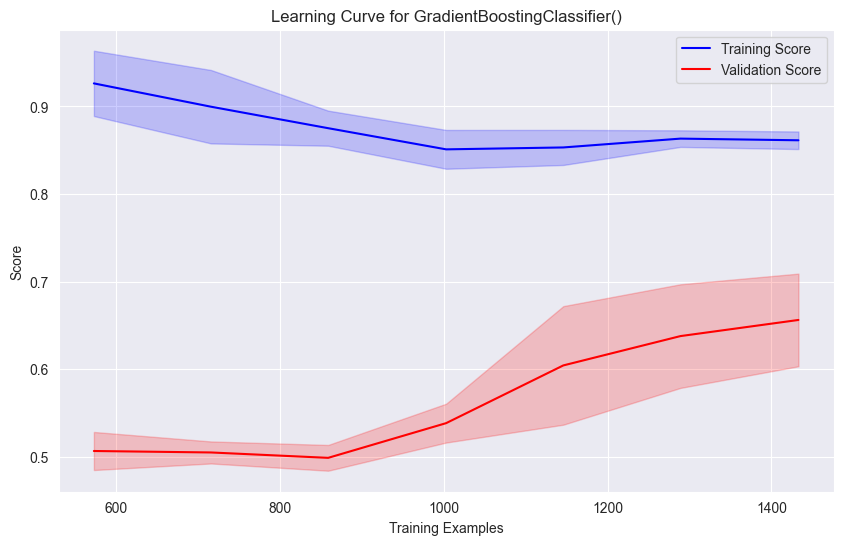

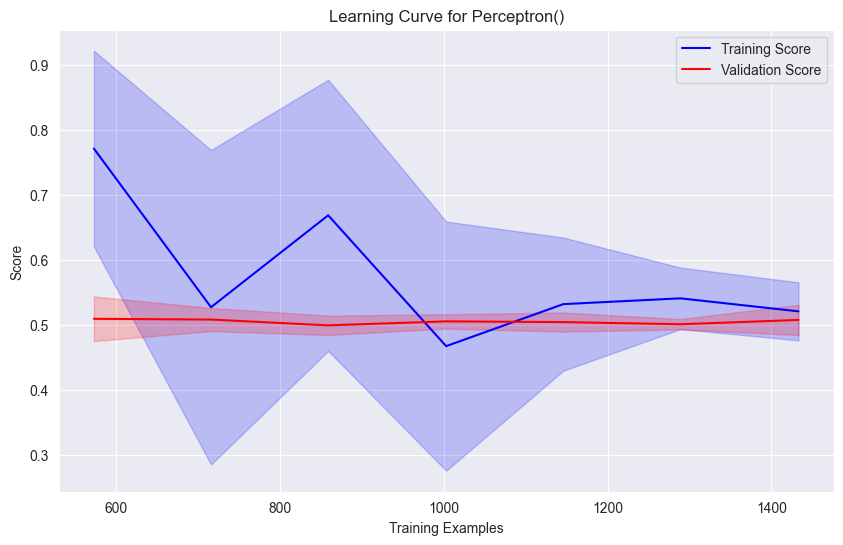

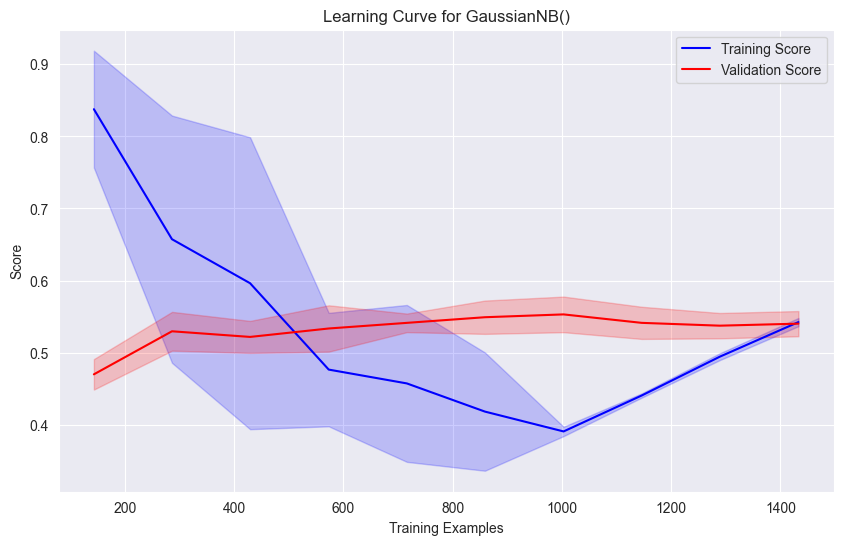

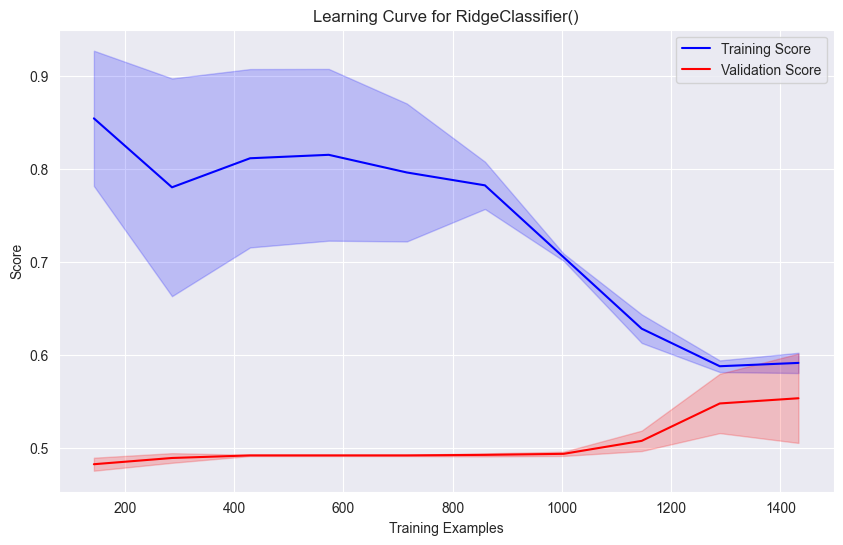

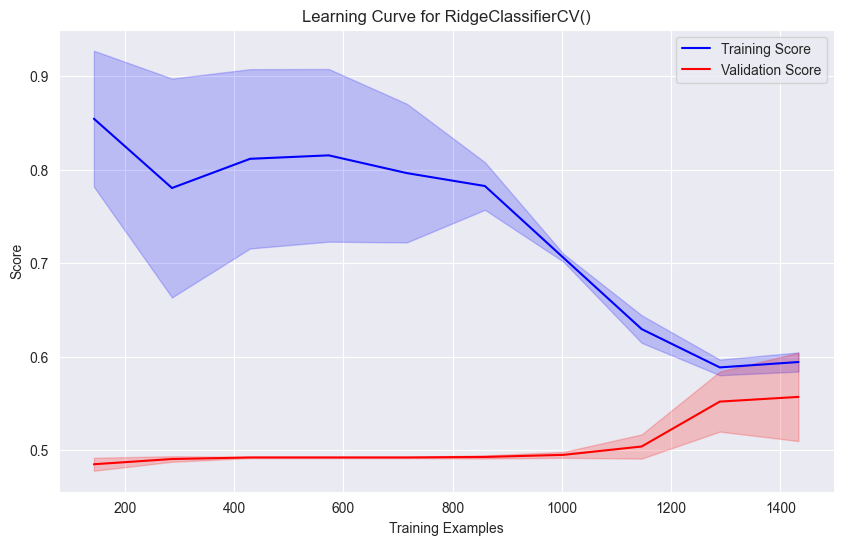

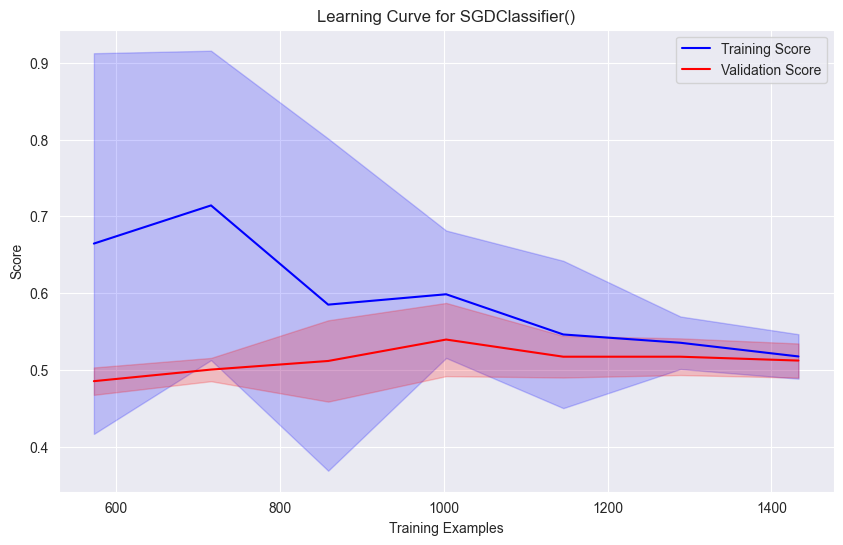

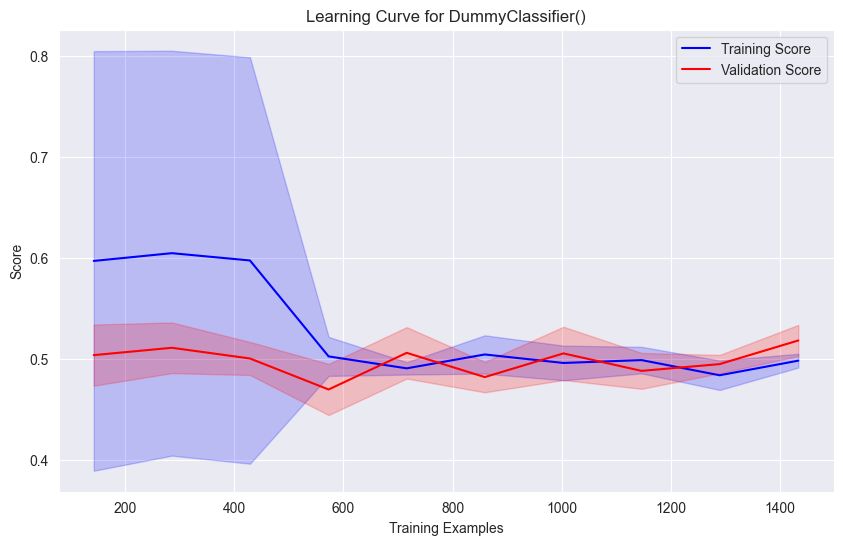

In [593]:
model_list = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              LogisticRegression(),
              KNeighborsClassifier(),
              GradientBoostingClassifier(),
              Perceptron(),
              GaussianNB(),
              RidgeClassifier(),
              RidgeClassifierCV(),
              SGDClassifier(),
              DummyClassifier(strategy="uniform")]
model_list_names = ["DecisionTreeClassifier()",
              "RandomForestClassifier()",
              "AdaBoostClassifier()",
              "LogisticRegression()",
              "KNeighborsClassifier()",
              "GradientBoostingClassifier()",
              "Perceptron()",
              "GaussianNB()",
              "RidgeClassifier()",
              "RidgeClassifierCV()",
              "SGDClassifier()",
              "DummyClassifier()"]
scoring_methods = ["accuracy", "balanced_accuracy", "recall", "f1", "roc_auc"]
score_list = []
for i in range(len(model_list)):
    model = model_list[i]
    model.fit(X_train_adasyn, y_train_adasyn)

    score = pd.Series(cross_validate(model, X_train_adasyn, y_train_adasyn, cv=5, scoring=scoring_methods, return_train_score=True, n_jobs=-1)).apply(np.mean)
    score_list.append(score)

    #plotting learning curve
    plot_learning_curve(model_list_names[i], model, X_train_adasyn, y_train_adasyn, np.linspace(0.1, 1.0, 10), 5)

In [594]:
scoring = pd.DataFrame(score_list, index=model_list_names)
display(scoring.style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    ))

,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier(),0.009375,0.007893,0.670782,1.000000,0.670131,1.000000,0.708791,1.000000,0.685010,1.000000,0.670131,1.000000
RandomForestClassifier(),0.287682,0.029102,0.790756,1.000000,0.790201,1.000000,0.823077,1.000000,0.798754,1.000000,0.868980,1.000000
AdaBoostClassifier(),0.123299,0.020612,0.599359,0.704803,0.599057,0.704221,0.614286,0.741484,0.604246,0.718394,0.655195,0.782761
LogisticRegression(),0.014156,0.006782,0.556401,0.602261,0.555212,0.600901,0.630769,0.688462,0.590179,0.637227,0.598858,0.637257
KNeighborsClassifier(),0.004582,0.021161,0.594851,0.751534,0.593891,0.750755,0.653846,0.800549,0.619953,0.765916,0.630632,0.831182
GradientBoostingClassifier(),0.349382,0.007579,0.657408,0.861749,0.657172,0.861177,0.668132,0.897802,0.658042,0.868344,0.733809,0.940458
Perceptron(),0.003191,0.006583,0.530690,0.544787,0.525925,0.539717,0.834066,0.863462,0.630218,0.649712,0.577279,0.602091
GaussianNB(),0.002594,0.006582,0.540175,0.542411,0.533737,0.535970,0.945055,0.948077,0.676090,0.677855,0.571422,0.602598
RidgeClassifier(),0.003780,0.006781,0.553622,0.590541,0.552608,0.589427,0.616484,0.661264,0.582514,0.621019,0.594115,0.629494
RidgeClassifierCV(),0.004817,0.007151,0.555853,0.594308,0.554712,0.593075,0.626374,0.672527,0.587563,0.627128,0.593827,0.630121


___

# Hyper Tuning

GradientBoostingClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB have the highest test_f1 scores. 

However, of the 4, GaussianNB has a very poor learning rate as seen from the learning curve plotted. Thus use the other 3 models

Thus I will continue to use these 3 models, and refine them.

In [595]:
parameters = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'n_estimators': [100, 200, 300, 400, 500],
    "min_samples_split" : [2, 5, 10, 20],
    'max_depth': [3, 4, 5, 6, 7], 
    "max_leaf_nodes": [None, 5, 10, 20]
    }
clfgb = GridSearchCV(GradientBoostingClassifier(), parameters, n_jobs=-1, scoring="f1", cv=5, verbose=True) 
searchgb = clfgb.fit(X_train_adasyn, y_train_adasyn)
searchgb.best_score_

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


0.7811354477658292

In [596]:
searchgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_leaf_nodes': None,
 'min_samples_split': 5,
 'n_estimators': 400}

In [597]:
parameters = {
    "n_estimators": [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7], 
    "min_samples_split" : [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_leaf_nodes": [None, 5, 10, 20]
    } 
clfrf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, scoring="f1", cv=5, verbose=True) 
searchrf = clfrf.fit(X_train_adasyn, y_train_adasyn)
searchrf.best_score_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


0.7284041209591618

In [598]:
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100], 
    "max_leaf_nodes": [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
    }

clfdtc = GridSearchCV(DecisionTreeClassifier(), params_grid, cv=5, n_jobs=-1, scoring="f1", verbose=True) 
searchdtc = clfdtc.fit(X_train_adasyn, y_train_adasyn)
searchdtc.best_score_

Fitting 5 folds for each of 704 candidates, totalling 3520 fits


0.6891788160634901

In [599]:
search_list = [searchgb, searchrf, searchdtc]
for i in search_list:
    y_pred = i.predict(X_test)
    print((str(i.best_estimator_)).split("(")[0])
    print(i.best_params_)
    print(classification_report(y_test, y_pred))

GradientBoostingClassifier
{'learning_rate': 0.1, 'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_split': 5, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       378
           1       0.22      0.47      0.30       102

    accuracy                           0.54       480
   macro avg       0.51      0.51      0.48       480
weighted avg       0.67      0.54      0.58       480

RandomForestClassifier
{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       378
           1       0.24      0.63      0.35       102

    accuracy                           0.50       480
   macro avg       0.53      0.54      0.47       480
weighted avg       0.70      0.50      0.54       480

DecisionTreeClassifier
{'max_depth': 90, 'max_leaf_nodes': None, 'min_samples_l

Since Gradient Boosting Classifier has the highest f1 score, i will continue with this model.

In [600]:
pickle.dump(searchgb, open("Saved_models/Gradient Boost CA1 Classification Model.p", "wb"))
searchgb = pickle.load(open("Saved_models/Gradient Boost CA1 Classification Model.p", "rb"))

Hyper Tuned Model

Hyper Tuned GradientBoostingRegressor
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       378
           1       0.22      0.47      0.30       102

    accuracy                           0.54       480
   macro avg       0.51      0.51      0.48       480
weighted avg       0.67      0.54      0.58       480

Default GradientBoostingRegressor
              precision    recall  f1-score   support

           0       0.80      0.47      0.59       378
           1       0.22      0.56      0.32       102

    accuracy                           0.49       480
   macro avg       0.51      0.51      0.45       480
weighted avg       0.67      0.49      0.53       480

Dummy Model
              precision    recall  f1-score   support

           0       0.48      0.79      0.60       228
           1       0.54      0.22      0.31       252

    accuracy                           0.49       480
   macro avg       0.51      0.51      0.45 

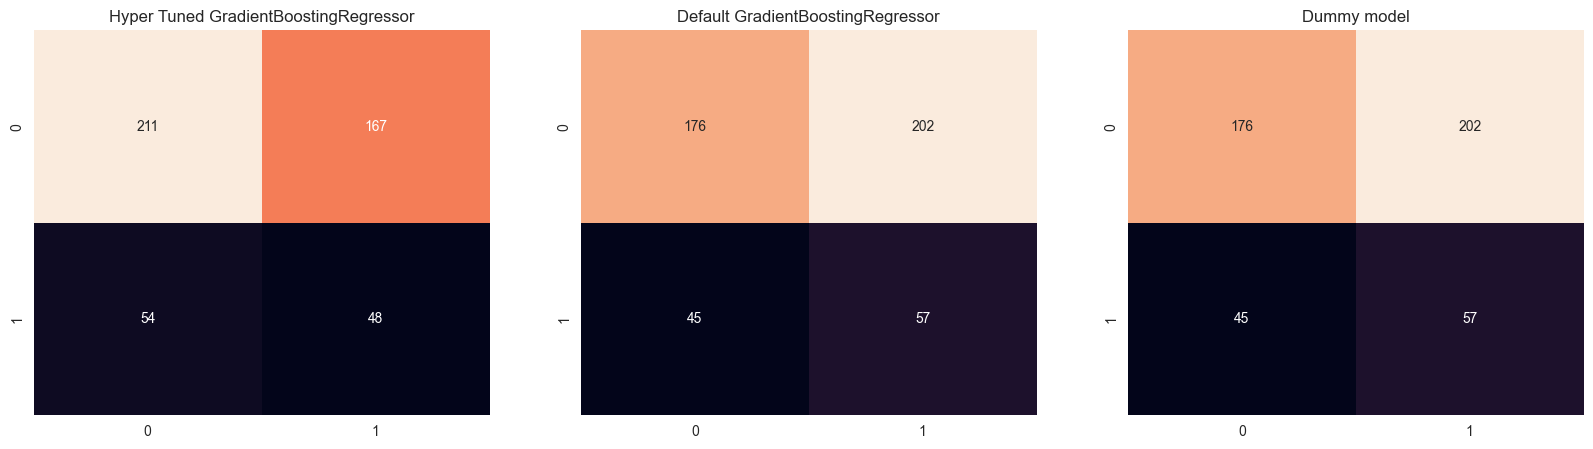

In [601]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
print("Hyper Tuned GradientBoostingRegressor")
expected = y_test
predicted = searchgb.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
sns.heatmap(metrics.confusion_matrix(expected, predicted), cbar=False, annot=True, fmt="g", ax=ax1)
ax1.set_title("Hyper Tuned GradientBoostingRegressor")

print("Default GradientBoostingRegressor")
predicted = GradientBoostingClassifier().fit(X_train_adasyn, y_train_adasyn).predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
sns.heatmap(metrics.confusion_matrix(expected, predicted), cbar=False, annot=True, fmt="g", ax=ax2)
ax2.set_title("Default GradientBoostingRegressor")

print("Dummy Model")
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
y_pred_baseline = dummy.predict(X_test)
y_recall = recall_score(y_pred_baseline, y_test)
print(metrics.classification_report(y_pred_baseline, y_test))
sns.heatmap(metrics.confusion_matrix(expected, predicted), cbar=False, annot=True, fmt="g", ax=ax3)
ax3.set_title("Dummy model")

plt.show()

Gradiant Boosted Classifier has a f1 weigted average of 0.53

The tuned Gradient Boosted Classifier has a f1 weighted average of 0.58.

This is above the dummy model with a f1 weighted average of 0.45.

The tuned gradient boosted classifier has a higher f1 weighted average than they dummy model. It it higher by 0.08, which is quite significant. And the hyper tuning caused an increase in f1 weighted average by 0.05 over the default model. Which is still quite a significant improvement over the base gradient boosted classifier.

___

# Model visualisation

[Text(0.519266917293233, 0.9375, 'x[6] <= -0.246\nfriedman_mse = 0.25\nsamples = 1792\nvalue = 0.0'),
 Text(0.2556390977443609, 0.8125, 'x[7] <= 0.5\nfriedman_mse = 0.244\nsamples = 975\nvalue = 0.07'),
 Text(0.14285714285714285, 0.6875, 'x[5] <= -0.681\nfriedman_mse = 0.224\nsamples = 249\nvalue = 0.155'),
 Text(0.08270676691729323, 0.5625, 'x[0] <= -0.112\nfriedman_mse = 0.244\nsamples = 184\nvalue = 0.068'),
 Text(0.041353383458646614, 0.4375, 'x[5] <= -0.694\nfriedman_mse = 0.207\nsamples = 72\nvalue = 0.201'),
 Text(0.015037593984962405, 0.3125, 'x[0] <= -0.96\nfriedman_mse = 0.24\nsamples = 20\nvalue = -0.108'),
 Text(0.007518796992481203, 0.1875, 'friedman_mse = 0.0\nsamples = 5\nvalue = -2.032'),
 Text(0.022556390977443608, 0.1875, 'x[5] <= -0.7\nfriedman_mse = 0.249\nsamples = 15\nvalue = 0.026'),
 Text(0.015037593984962405, 0.0625, 'friedman_mse = 0.0\nsamples = 2\nvalue = -2.032'),
 Text(0.03007518796992481, 0.0625, 'friedman_mse = 0.237\nsamples = 13\nvalue = 0.43'),
 Text(

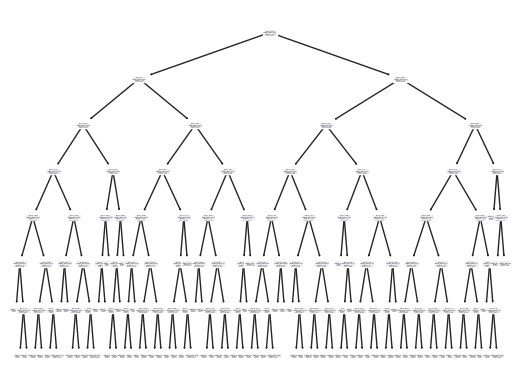

In [602]:
plot_tree(searchgb.best_estimator_[0, 0])

___

# Feature Importance

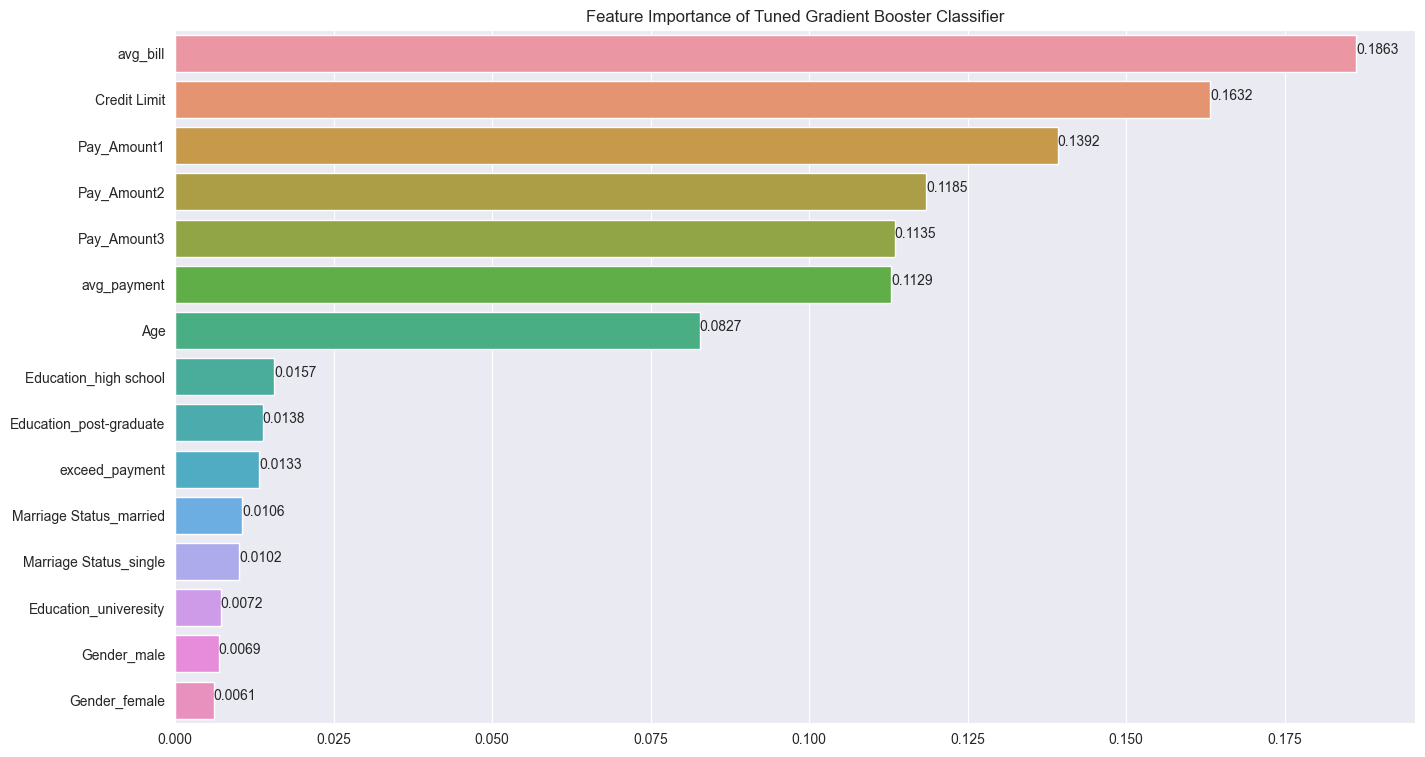

In [603]:
importance = pd.Series(
    searchgb.best_estimator_.feature_importances_, index=X.columns
).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax
)
ax.set_title("Feature Importance of Tuned {}".format("Gradient Booster Classifier"))
[
    ax.text(x=v, y=i, s=round(v, 4))
    for i, v in zip(np.arange(0, len(importance)), importance[importance > 0].values)
]
plt.show()

___

# Project Summary

We have successfully made a model that can predict the outcome of whether a customer will default or not on their next payment. We managed to recieve an f1 weighted average score of 0.58. However, the model still has areas to improve, and it currently faces some limitations, mainly due to the dataset size and quality. For the model to be fully deployed, i believe that it is necessary to collect more data so that the model has more to train and test on.